In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# libraries
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install wordcloud
import xgboost as xgb
import missingno as msno

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.shape

(6234, 12)

In [6]:
#set matplotlib config
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [7]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Oh My Ghost,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Data Cleanup

In [20]:
 data.isnull().sum() #checking for null values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [21]:
#Null records exist for country, cast, director, date added and rating
data['rating'].value_counts().unique()

array([2027, 1698,  701,  508,  286,  218,  184,  169,  149,  143,   95,
         37,    7,    2], dtype=int64)

In [22]:
#Instead of dropping rows that have null values for country, we will replace them with USA since Netflix was created in the united states and every show aired on netflix us. 
data['country'].replace(np.nan, 'United States',inplace  = True)

In [24]:
data['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [25]:
data['listed_in'].value_counts()

Documentaries                                             299
Stand-Up Comedy                                           273
Dramas, International Movies                              248
Dramas, Independent Movies, International Movies          186
Comedies, Dramas, International Movies                    174
                                                         ... 
Children & Family Movies, Faith & Spirituality              1
Kids' TV, TV Dramas, Teen TV Shows                          1
Comedies, Cult Movies, LGBTQ Movies                         1
Classic & Cult TV, Kids' TV, TV Comedies                    1
Children & Family Movies, Documentaries, Sports Movies      1
Name: listed_in, Length: 461, dtype: int64

In [26]:
#there are 10 missing values in the rating column, instead of dropping them I will replace them with the most common rating. TV-MA is the most common rating
max_value = data['rating'].value_counts().idxmax()

print('Highest frequency value:',max_value)

data['rating'].fillna(max_value, inplace=True)

print(data.isnull().sum())

Highest frequency value: TV-MA
show_id            0
type               0
title              0
director        1969
cast             570
country            0
date_added        11
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [27]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country            0
date_added        11
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
data.drop(['director','cast'],axis = 1,inplace = True)

In [29]:
data.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [30]:
#Remove release date since we already have release ytear
data.drop(['date_added'],axis =1,inplace = True)


In [31]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Exploratory Data Analysis

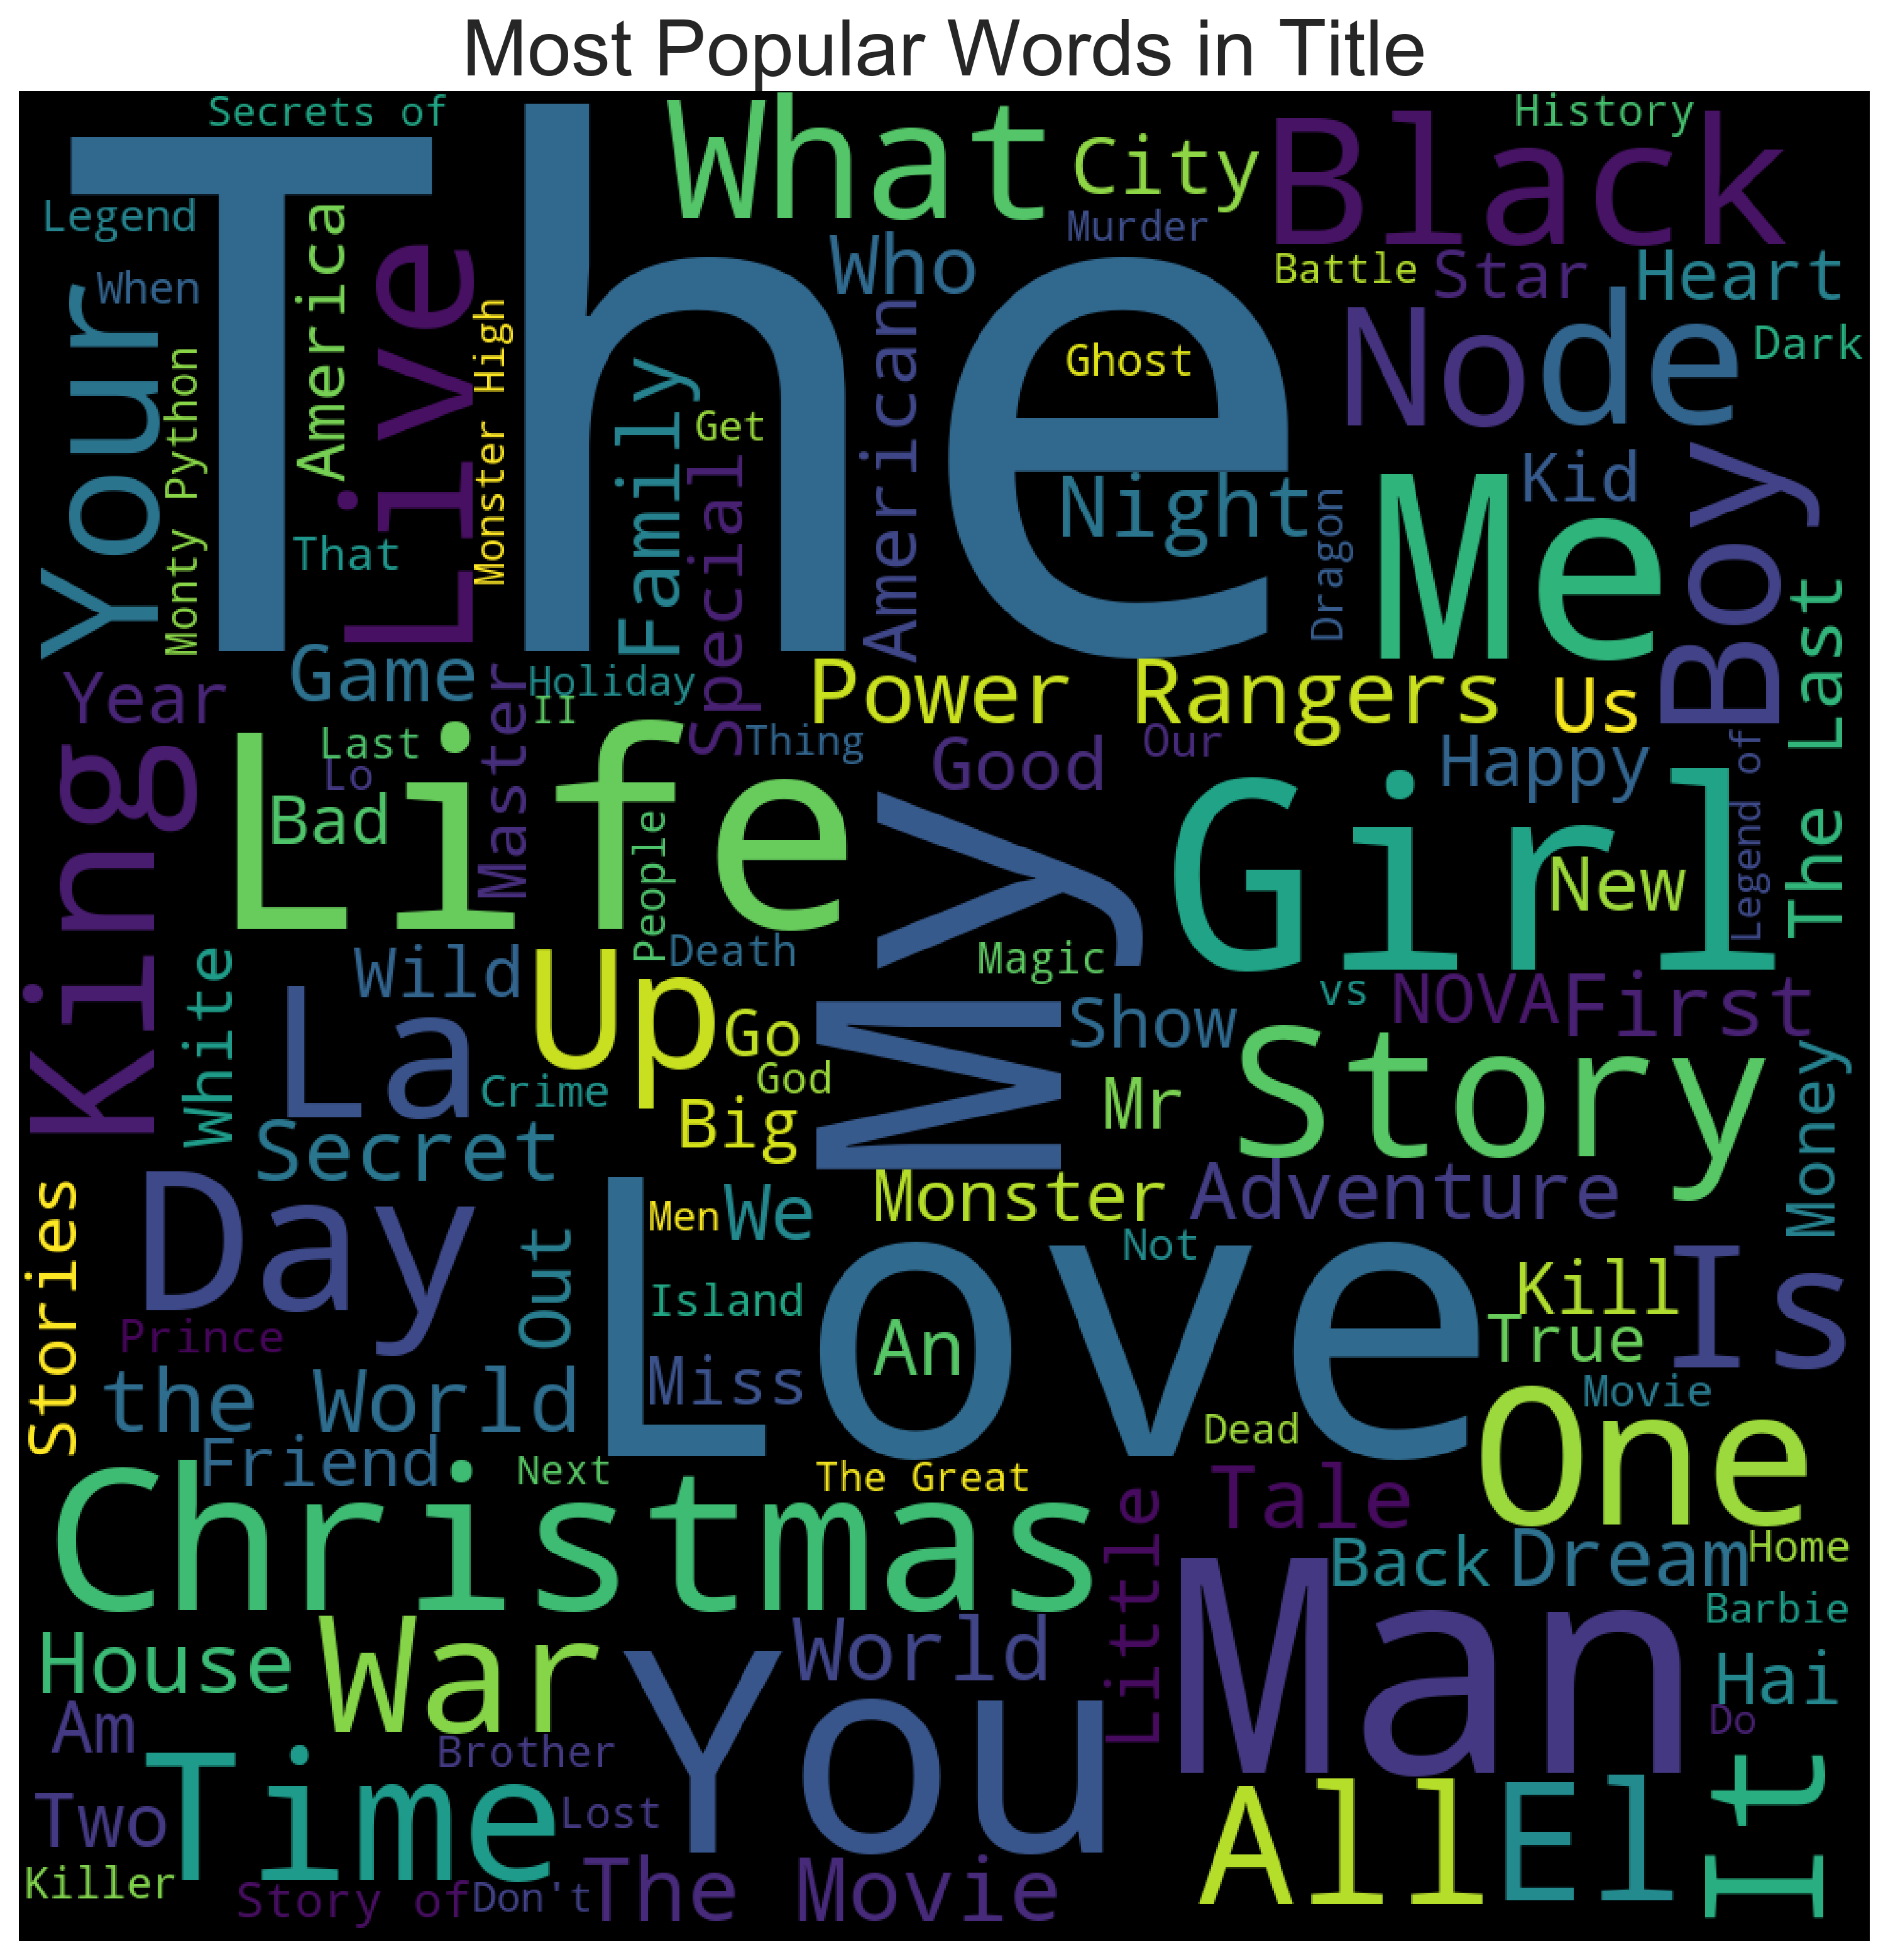

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(data['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

In [14]:
netflix_shows=data[data['type']=='TV Show']

In [15]:
data.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [16]:
netflix_movies=data[data['type']=='Movie']

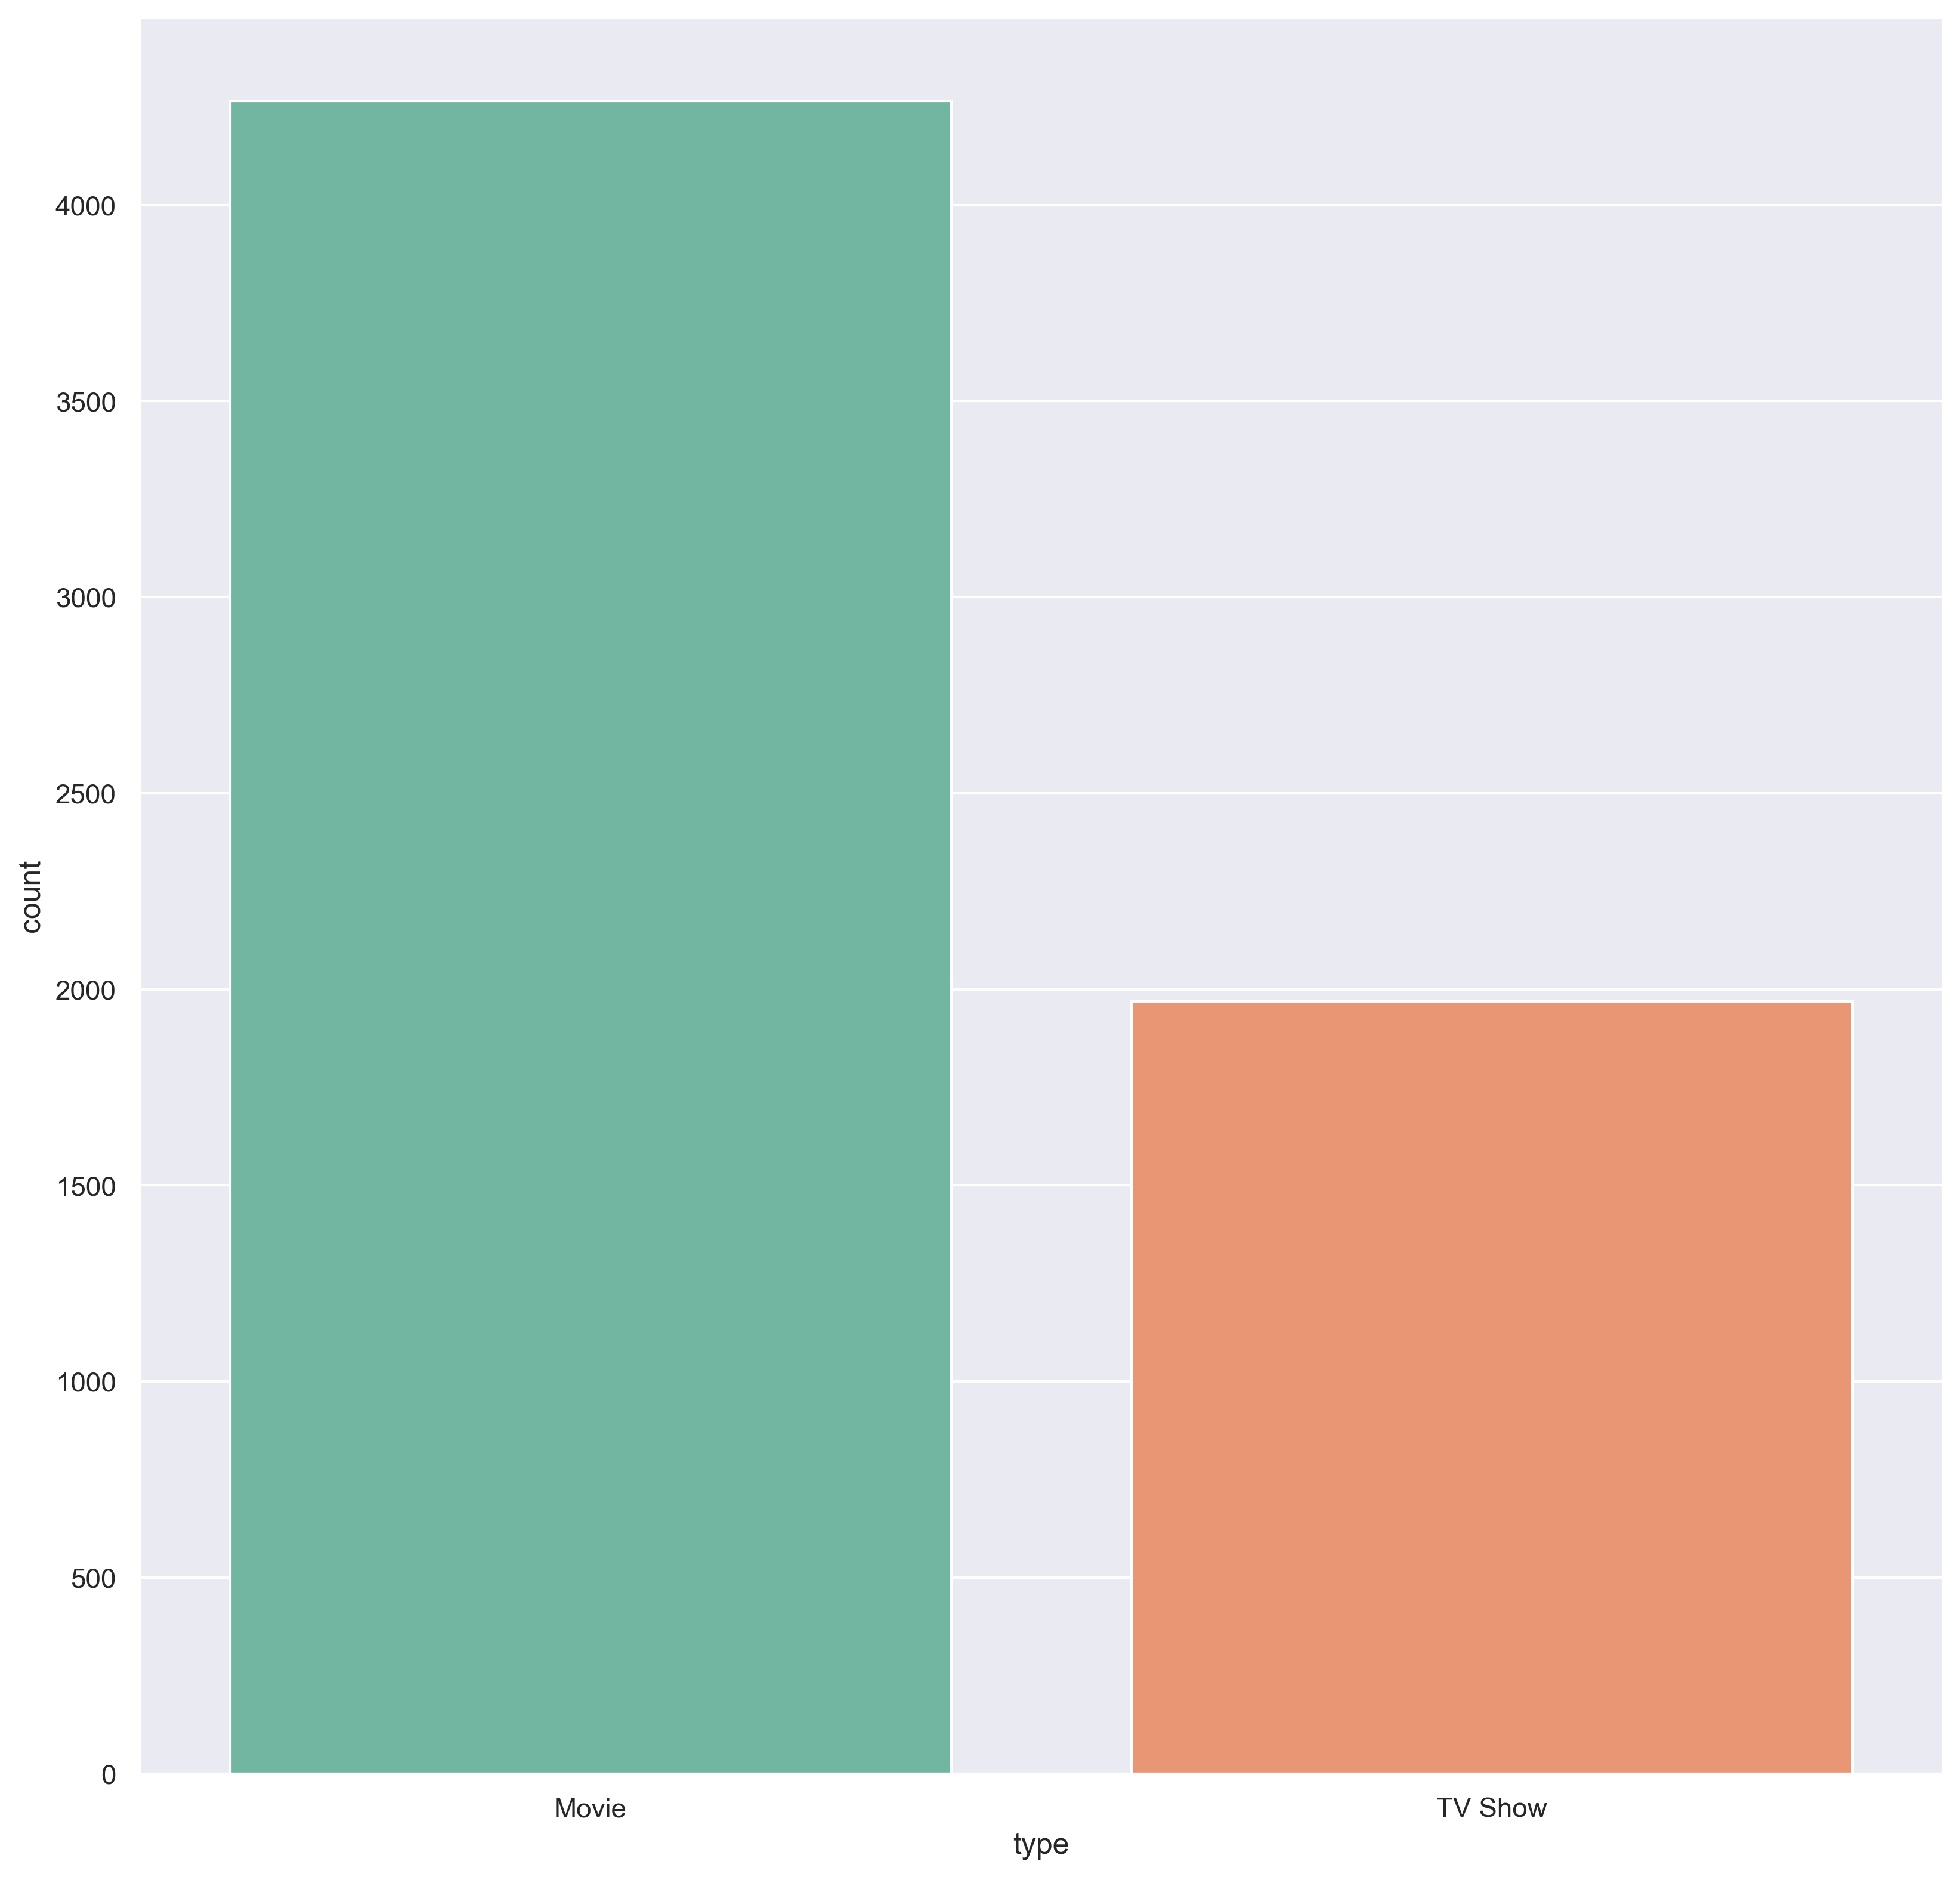

In [17]:
#There are more tvs on netflix than TV shows
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, palette="Set2")

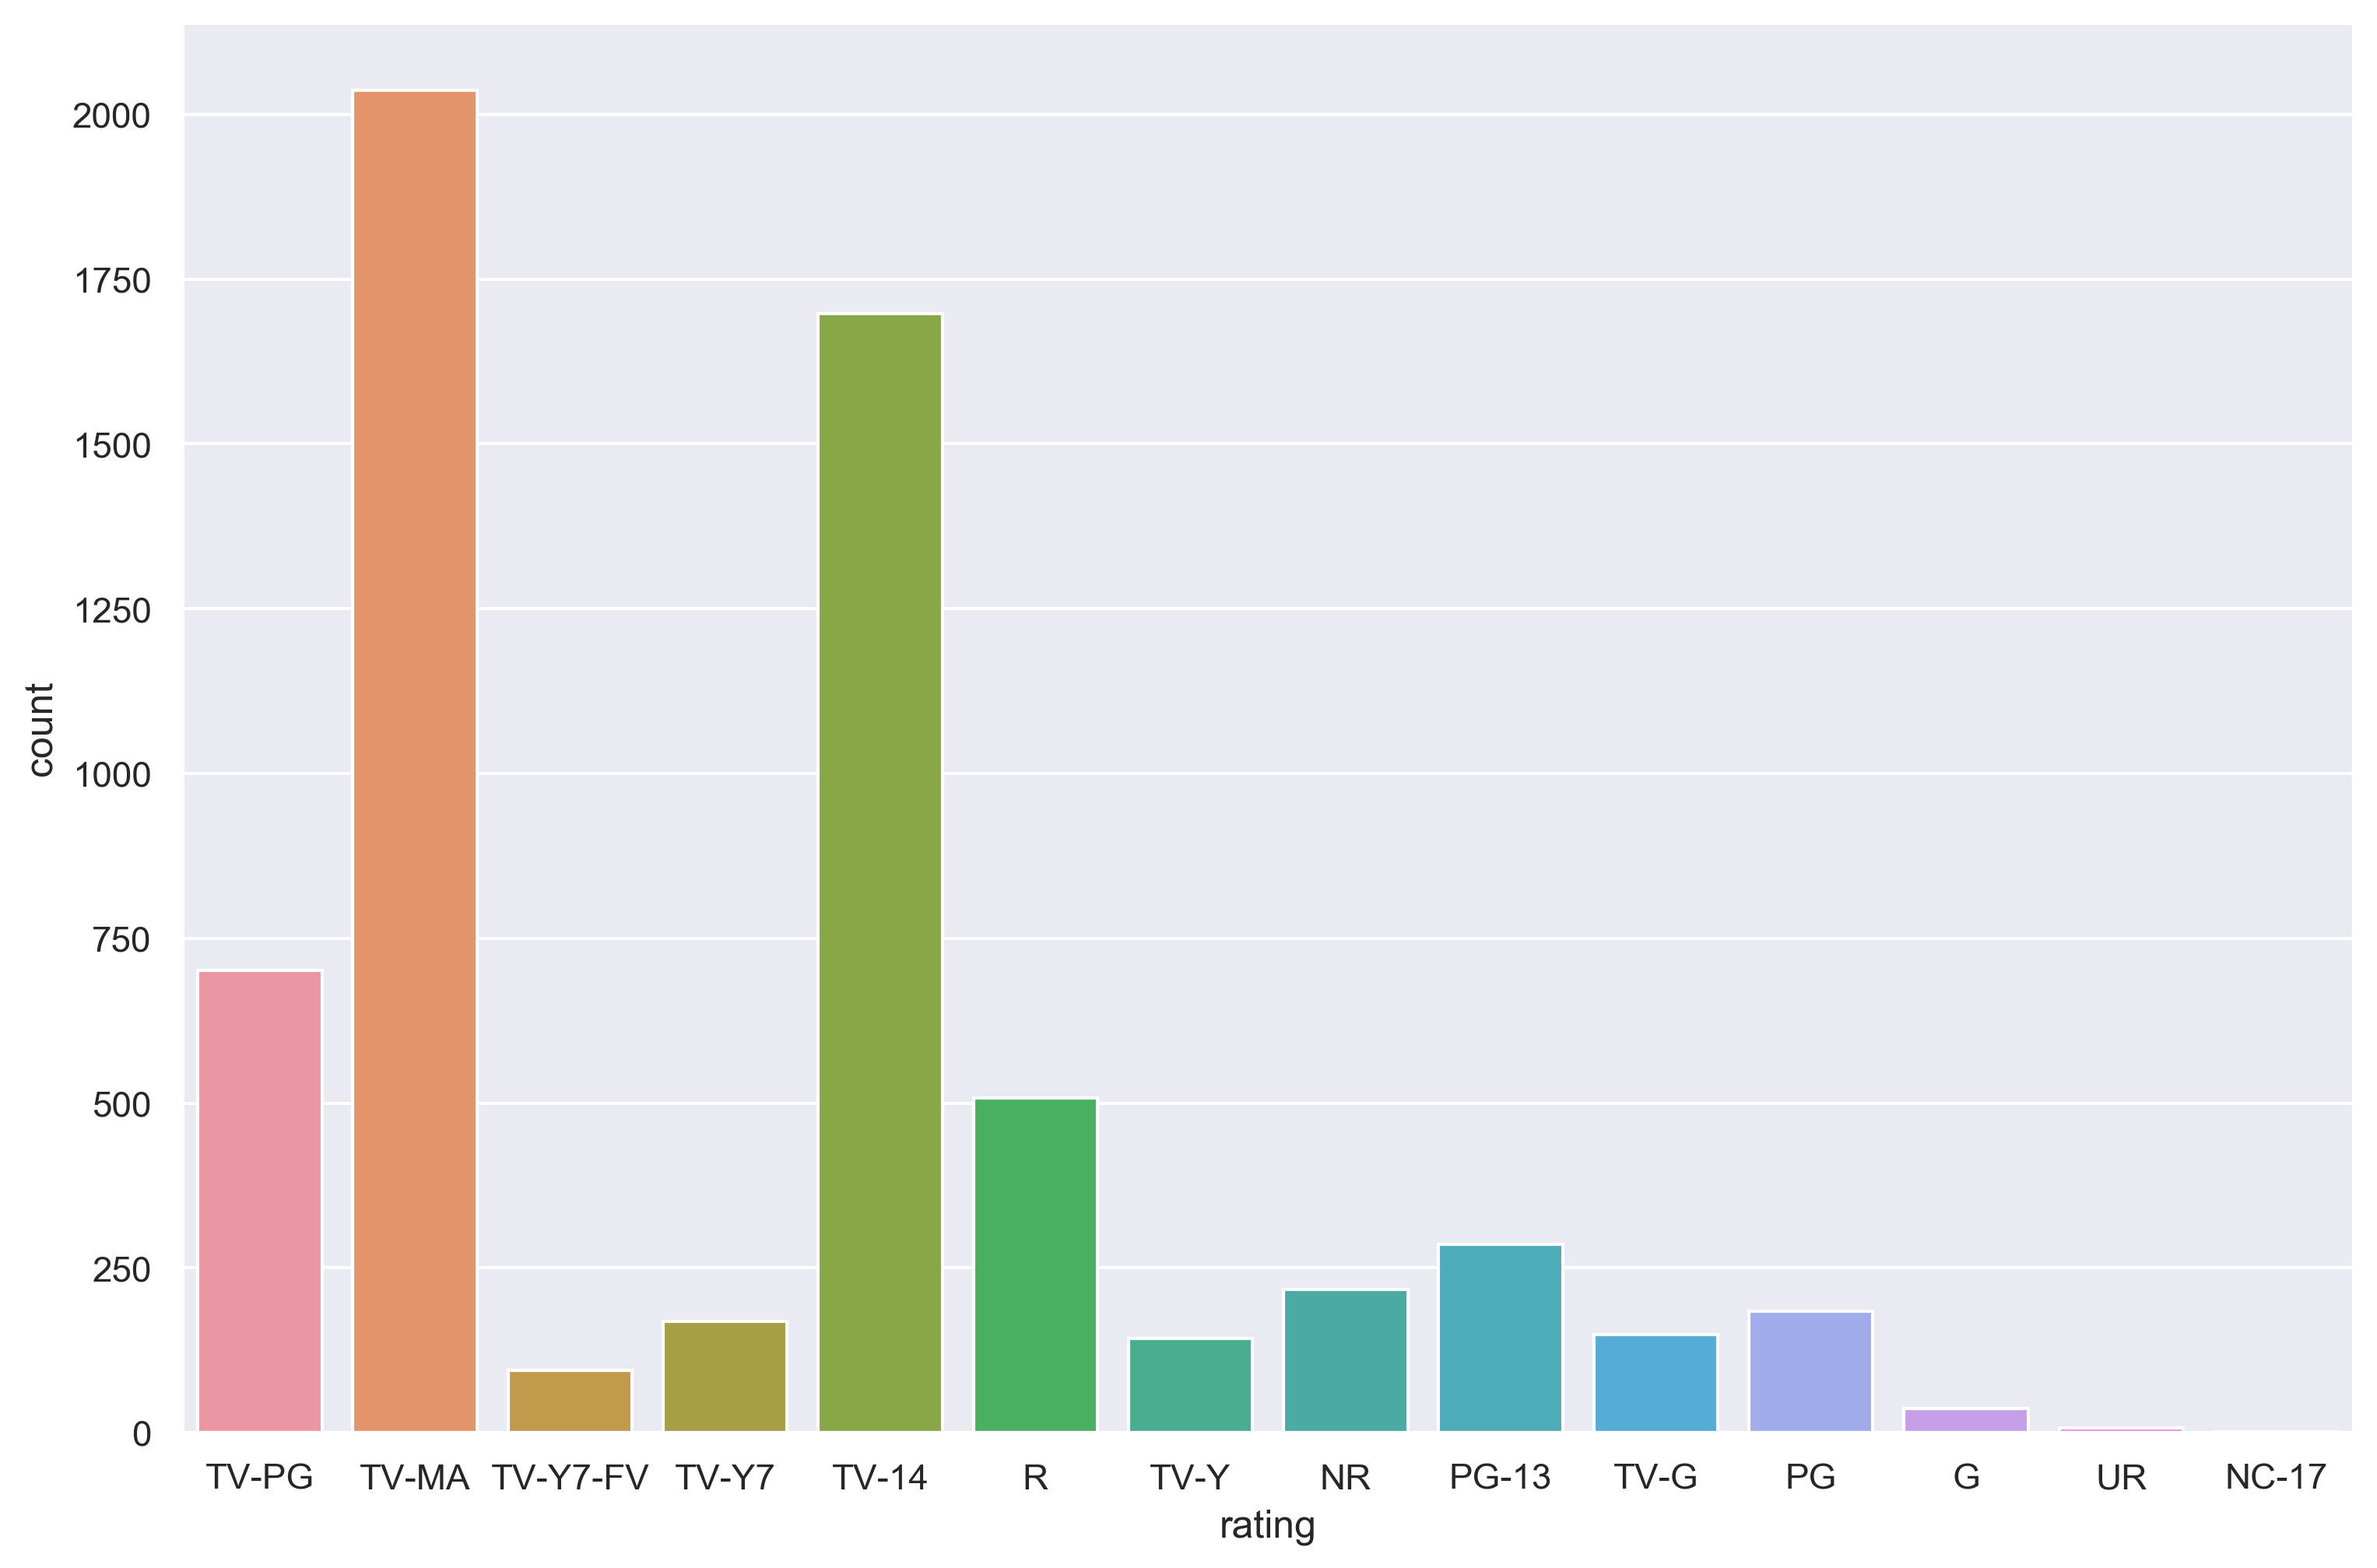

In [32]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data)

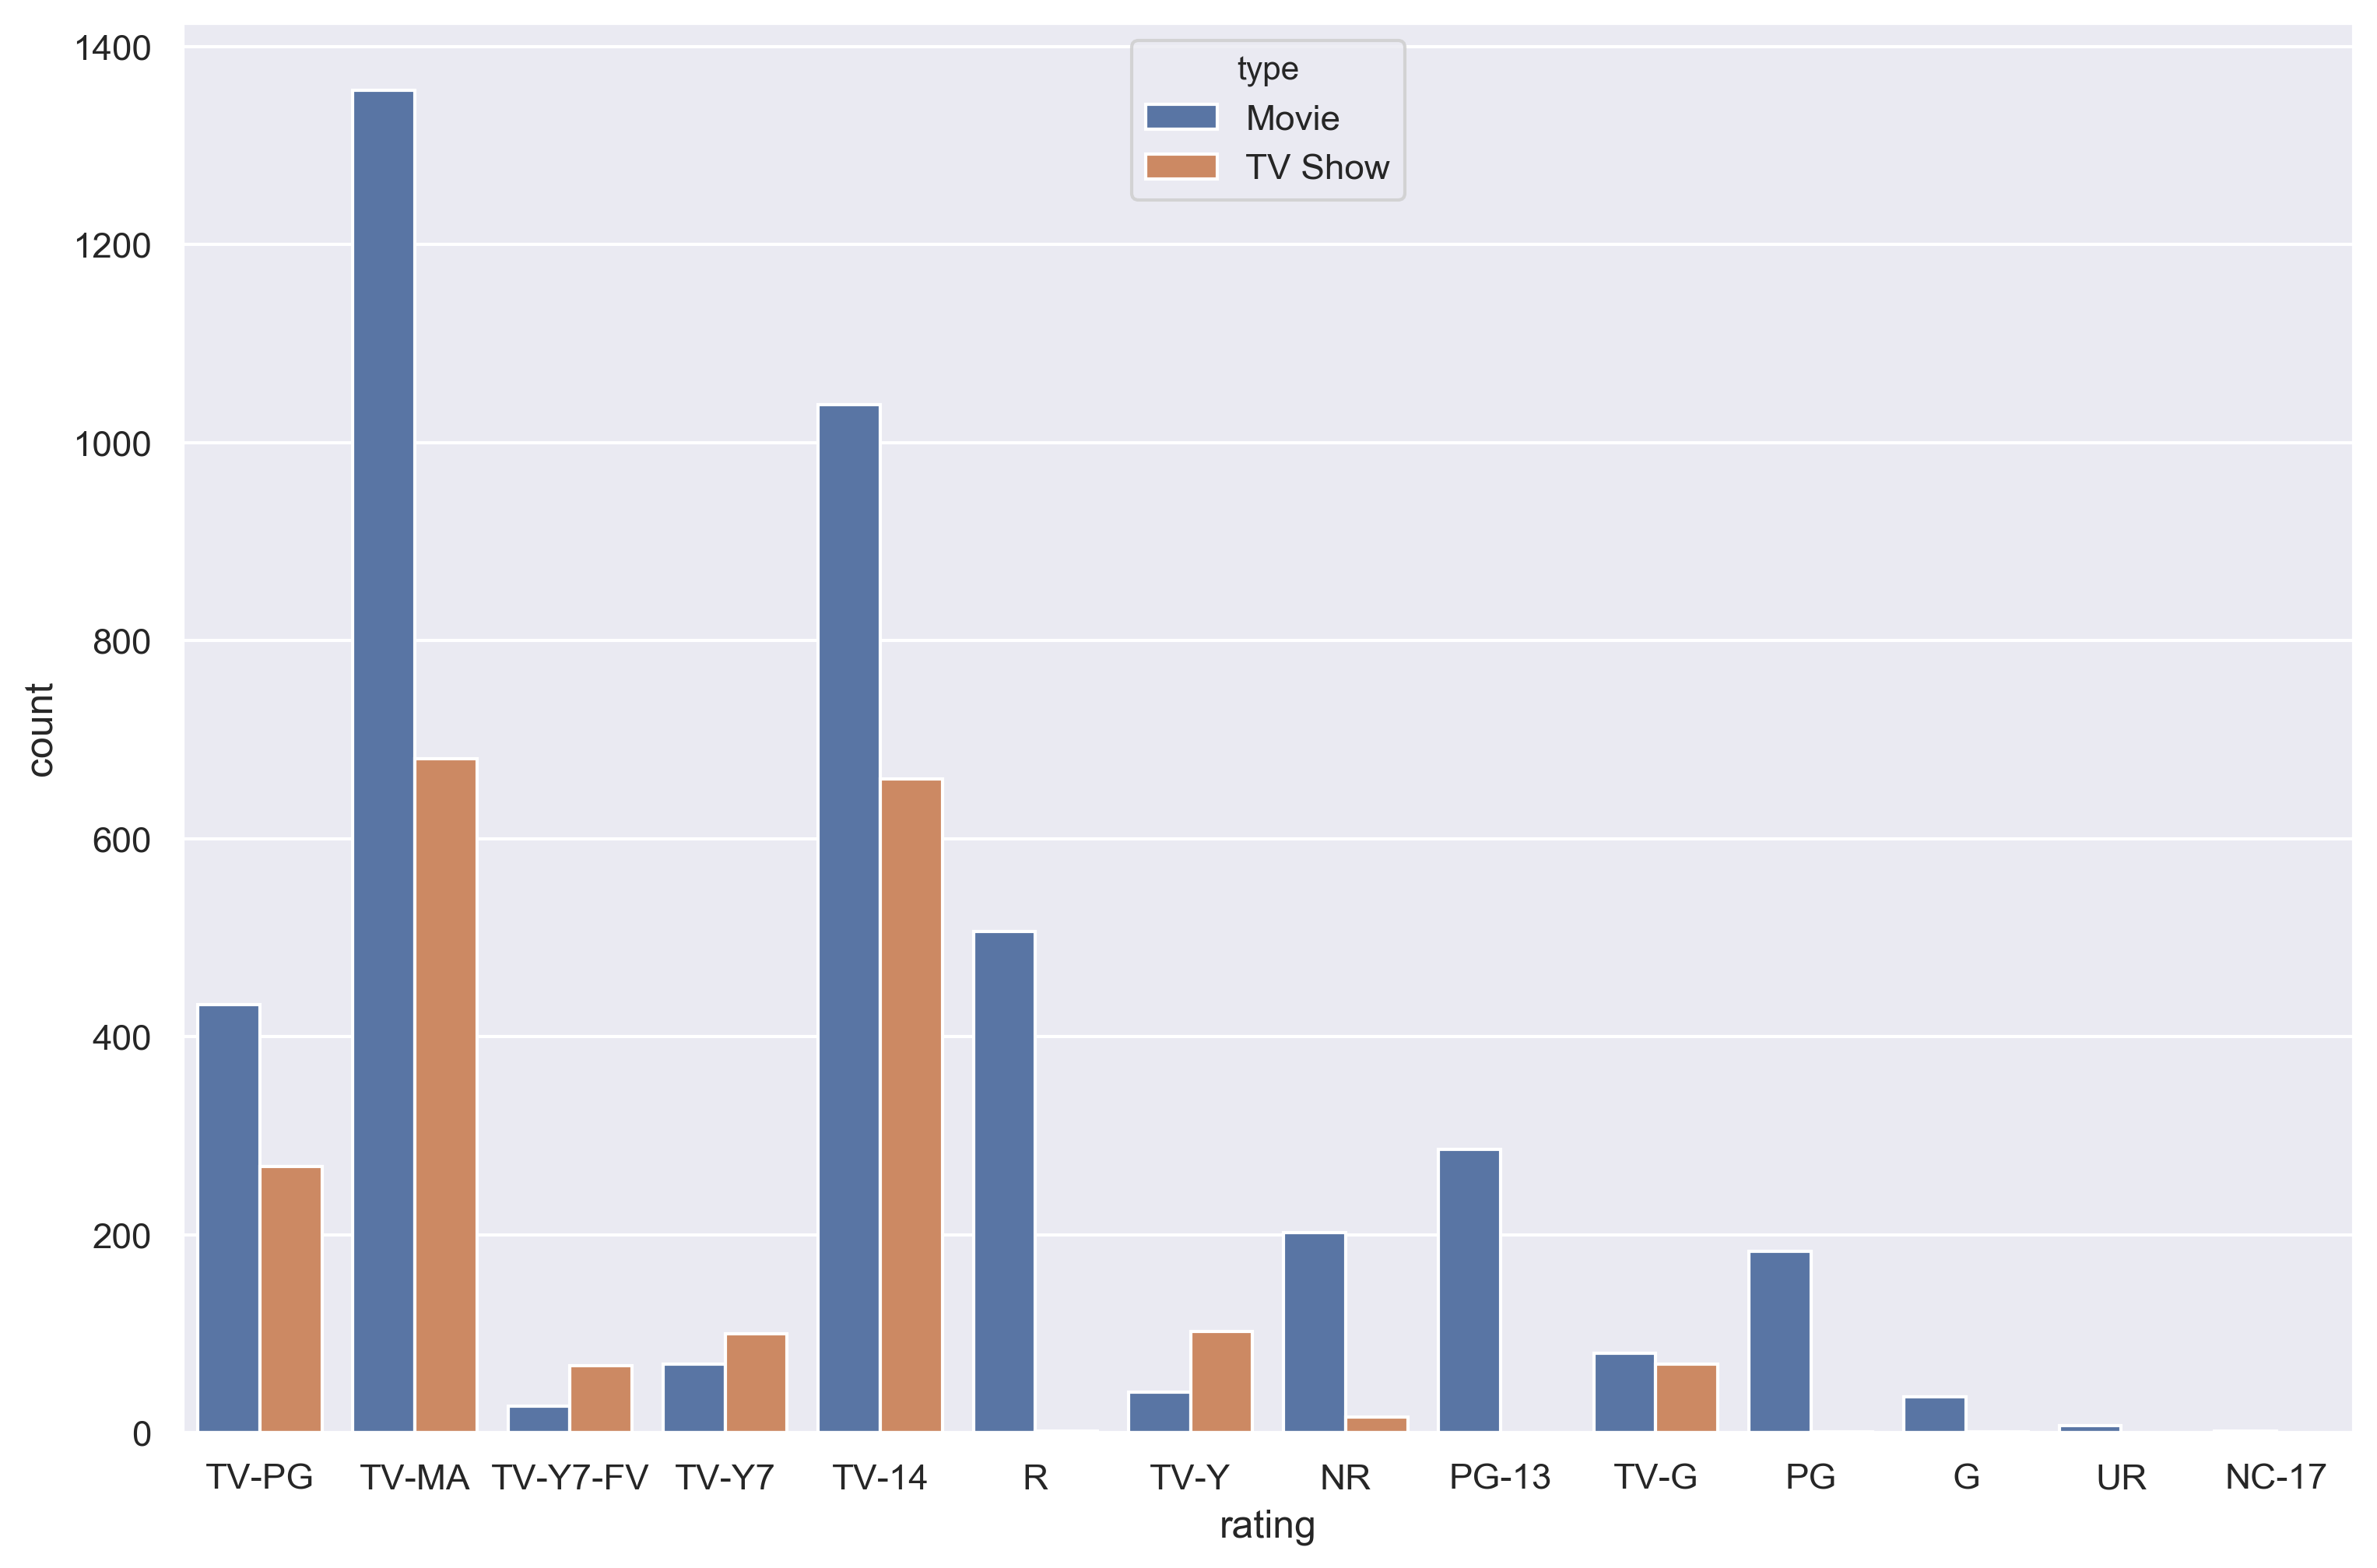

In [33]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data,hue='type')

In [34]:
old = data.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


In [35]:
tag = "Stand-Up Comedy" #standup shows on Netflix
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
10,Joaquín Reyes: Una y no más,United States,2017
53,Marc Maron: Too Real,United States,2017
113,Def Comedy Jam 25,United States,2017
126,Jeff Dunham: Beside Himself,United States,2019
134,Iliza Shlesinger: Confirmed Kills,United States,2016
181,Jerry Before Seinfeld,United States,2017
183,"Karol Modzelewski, Łukasz „Lotek” Lodkowski No...",United States,2016
184,"Katarzyna Piasecka, Rafał Pacześ Seriously Funny",United States,2016
185,"Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszc...",United States,2016
186,"Rafał Banaś, Michał Leja Laugh out Loud",United States,2016


In [36]:
tag = "Kids' TV" #Kids TV shows on Netflix
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
2,Transformers Prime,United States,2013
3,Transformers: Robots in Disguise,United States,2016
34,Archibald's Next Big Thing,United States,2019
64,Ben 10,United States,2016
70,We Bare Bears,United States,2017
101,Dragons: Rescue Riders,United States,2019
131,Team Kaylie,United States,2019
175,Kulipari: An Army of Frogs,United States,2016
203,The Last Kids on Earth,United States,2019
262,Super Monsters Monster Party,United States,2018


In [37]:
date = pd.DataFrame(data.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

,Year,Count
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

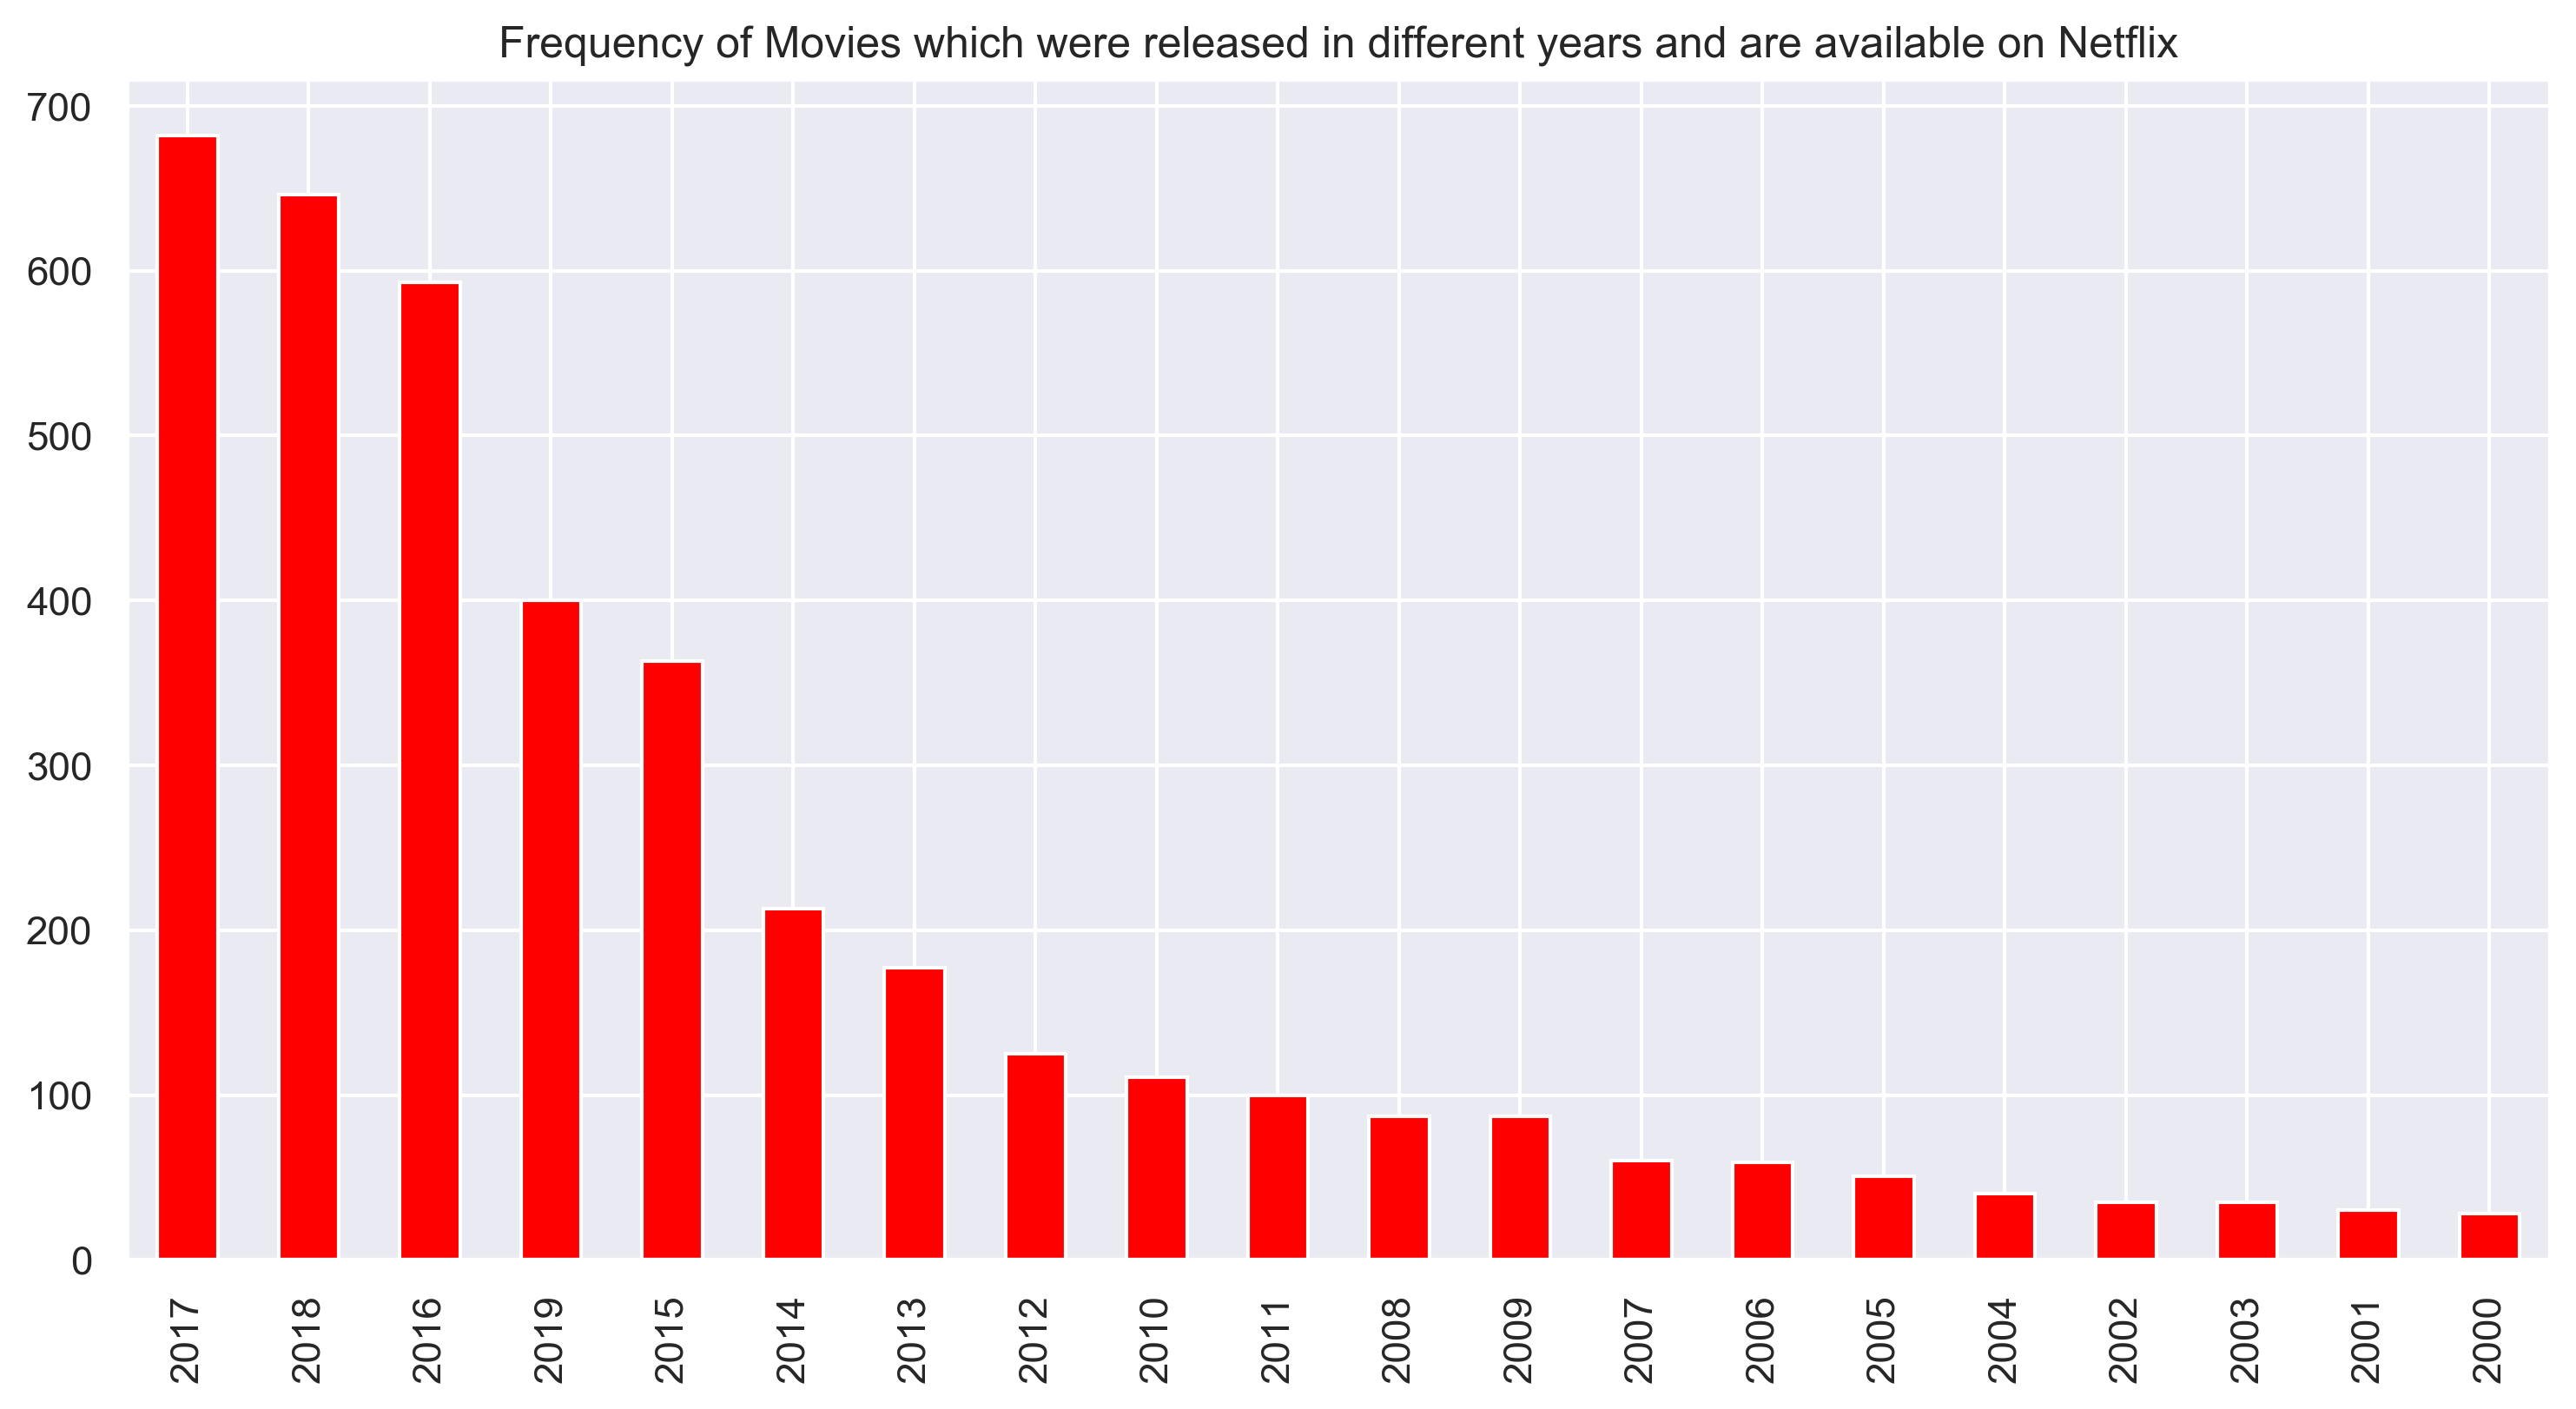

In [38]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

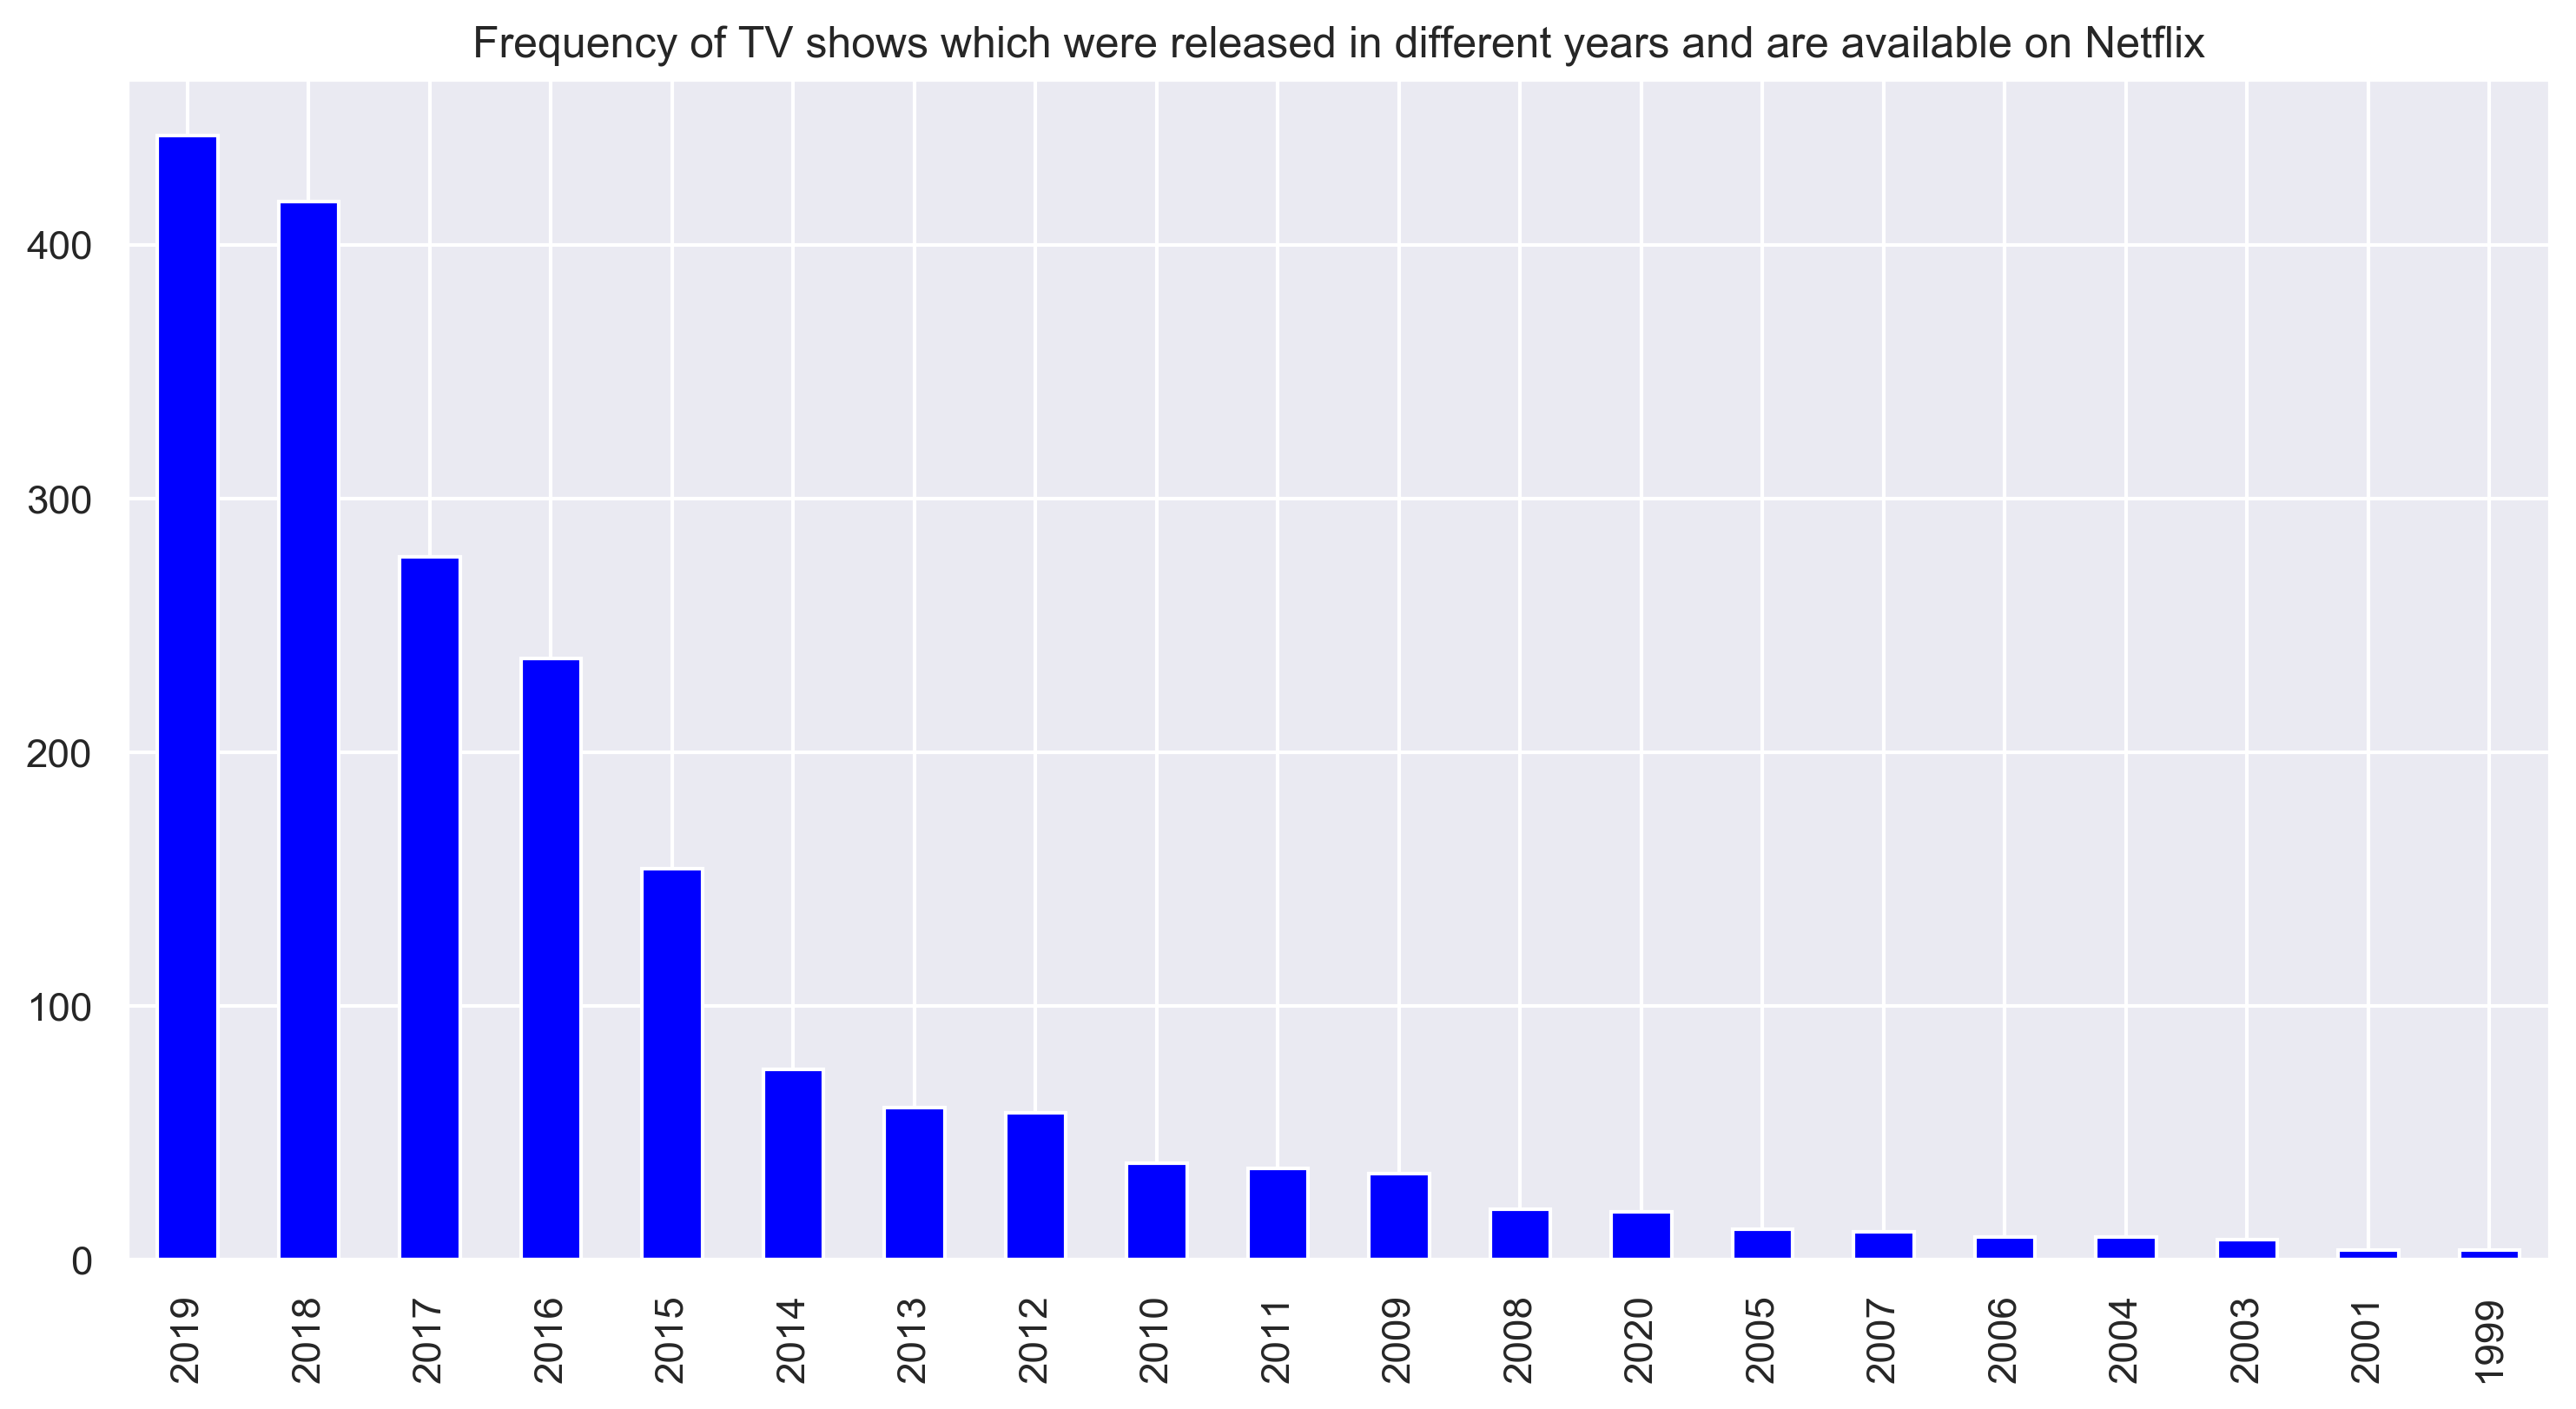

In [39]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

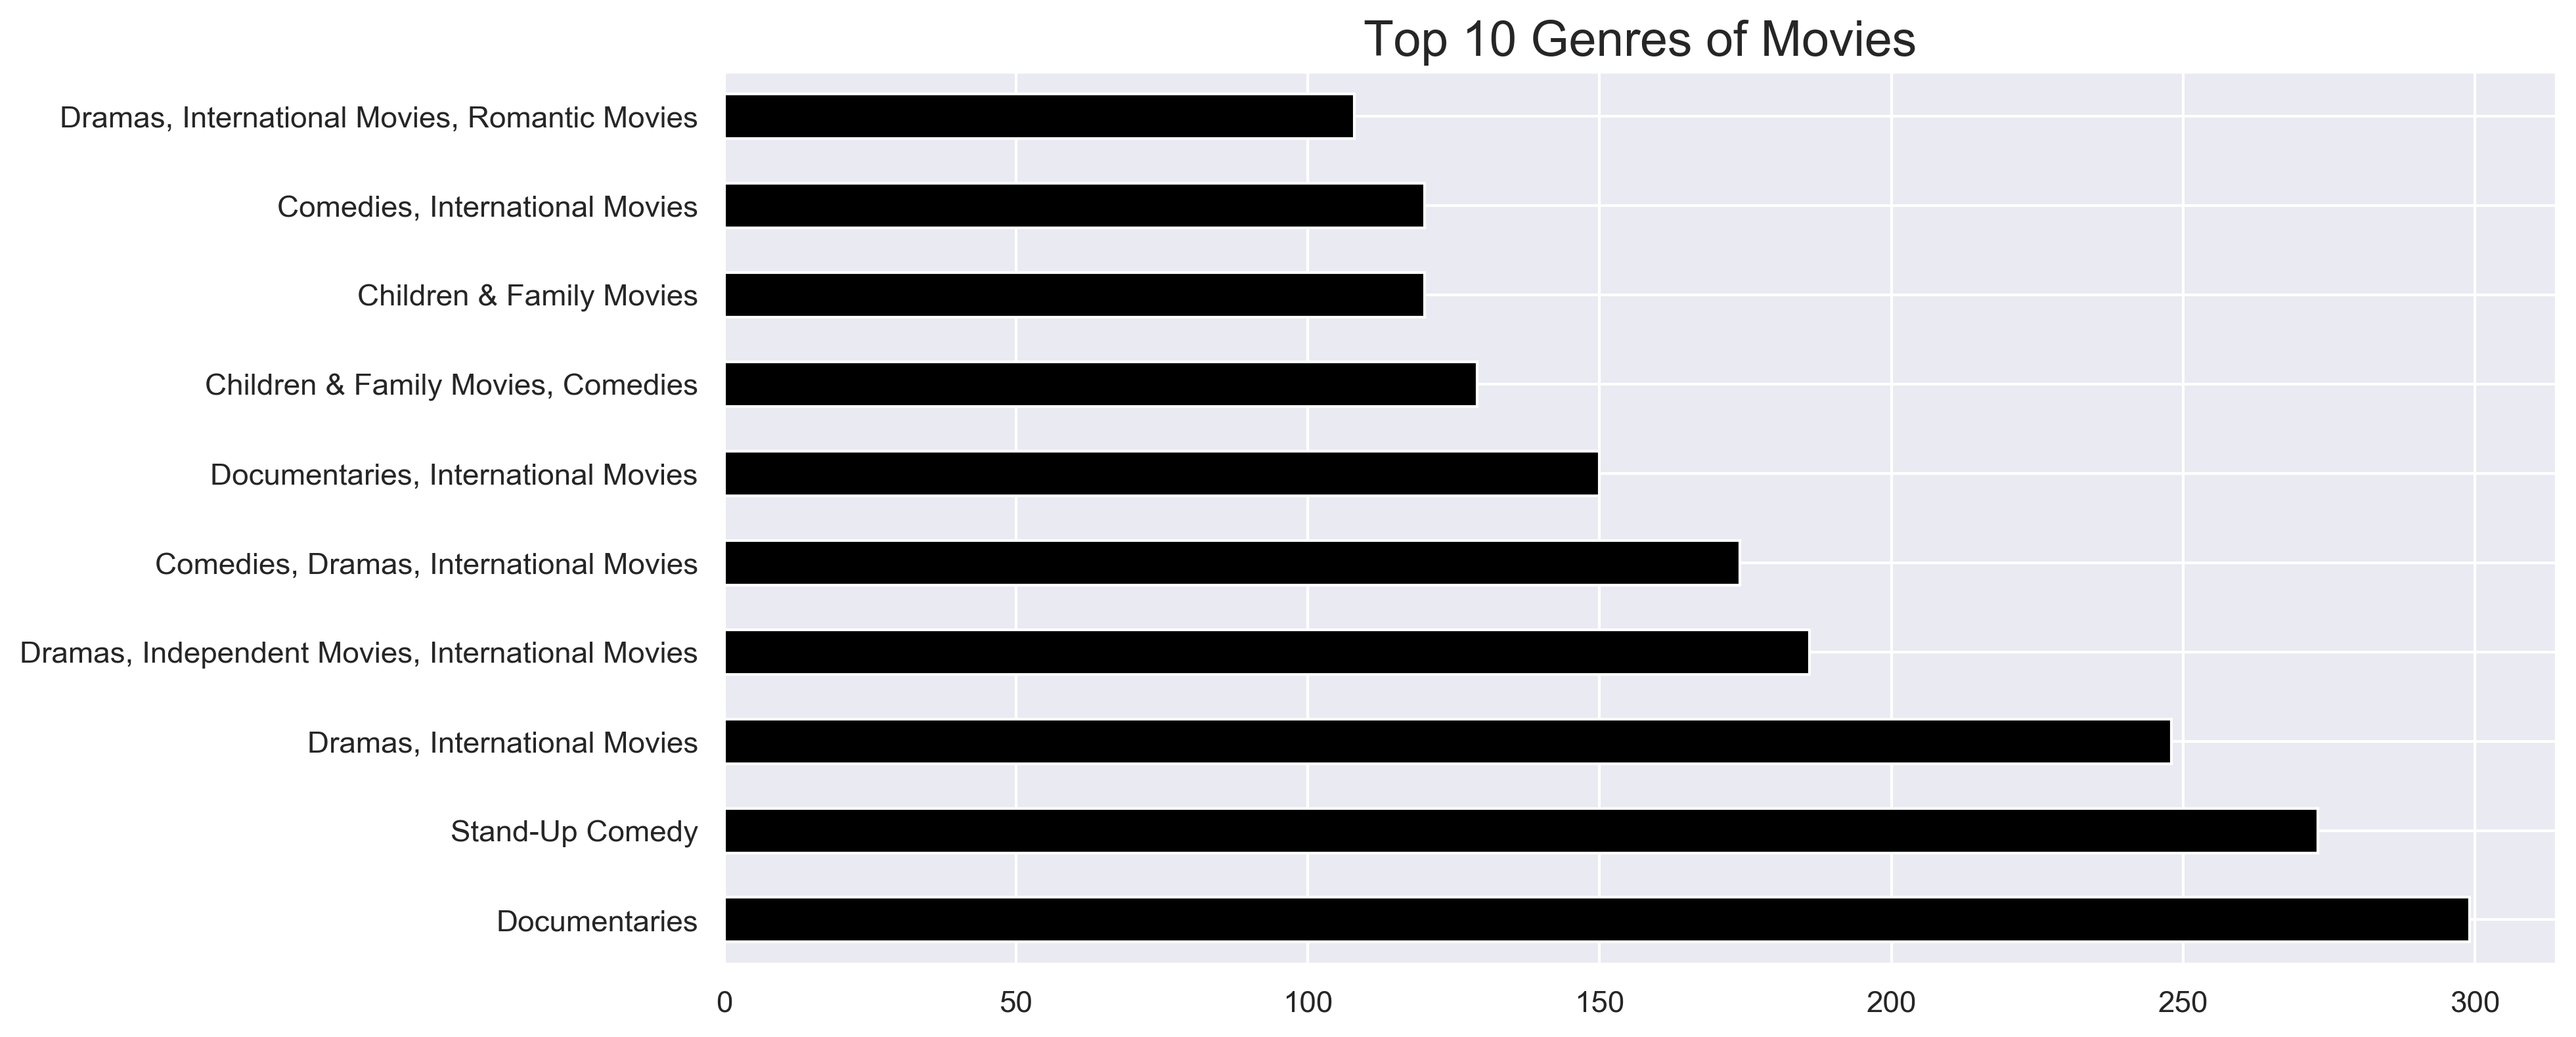

In [41]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

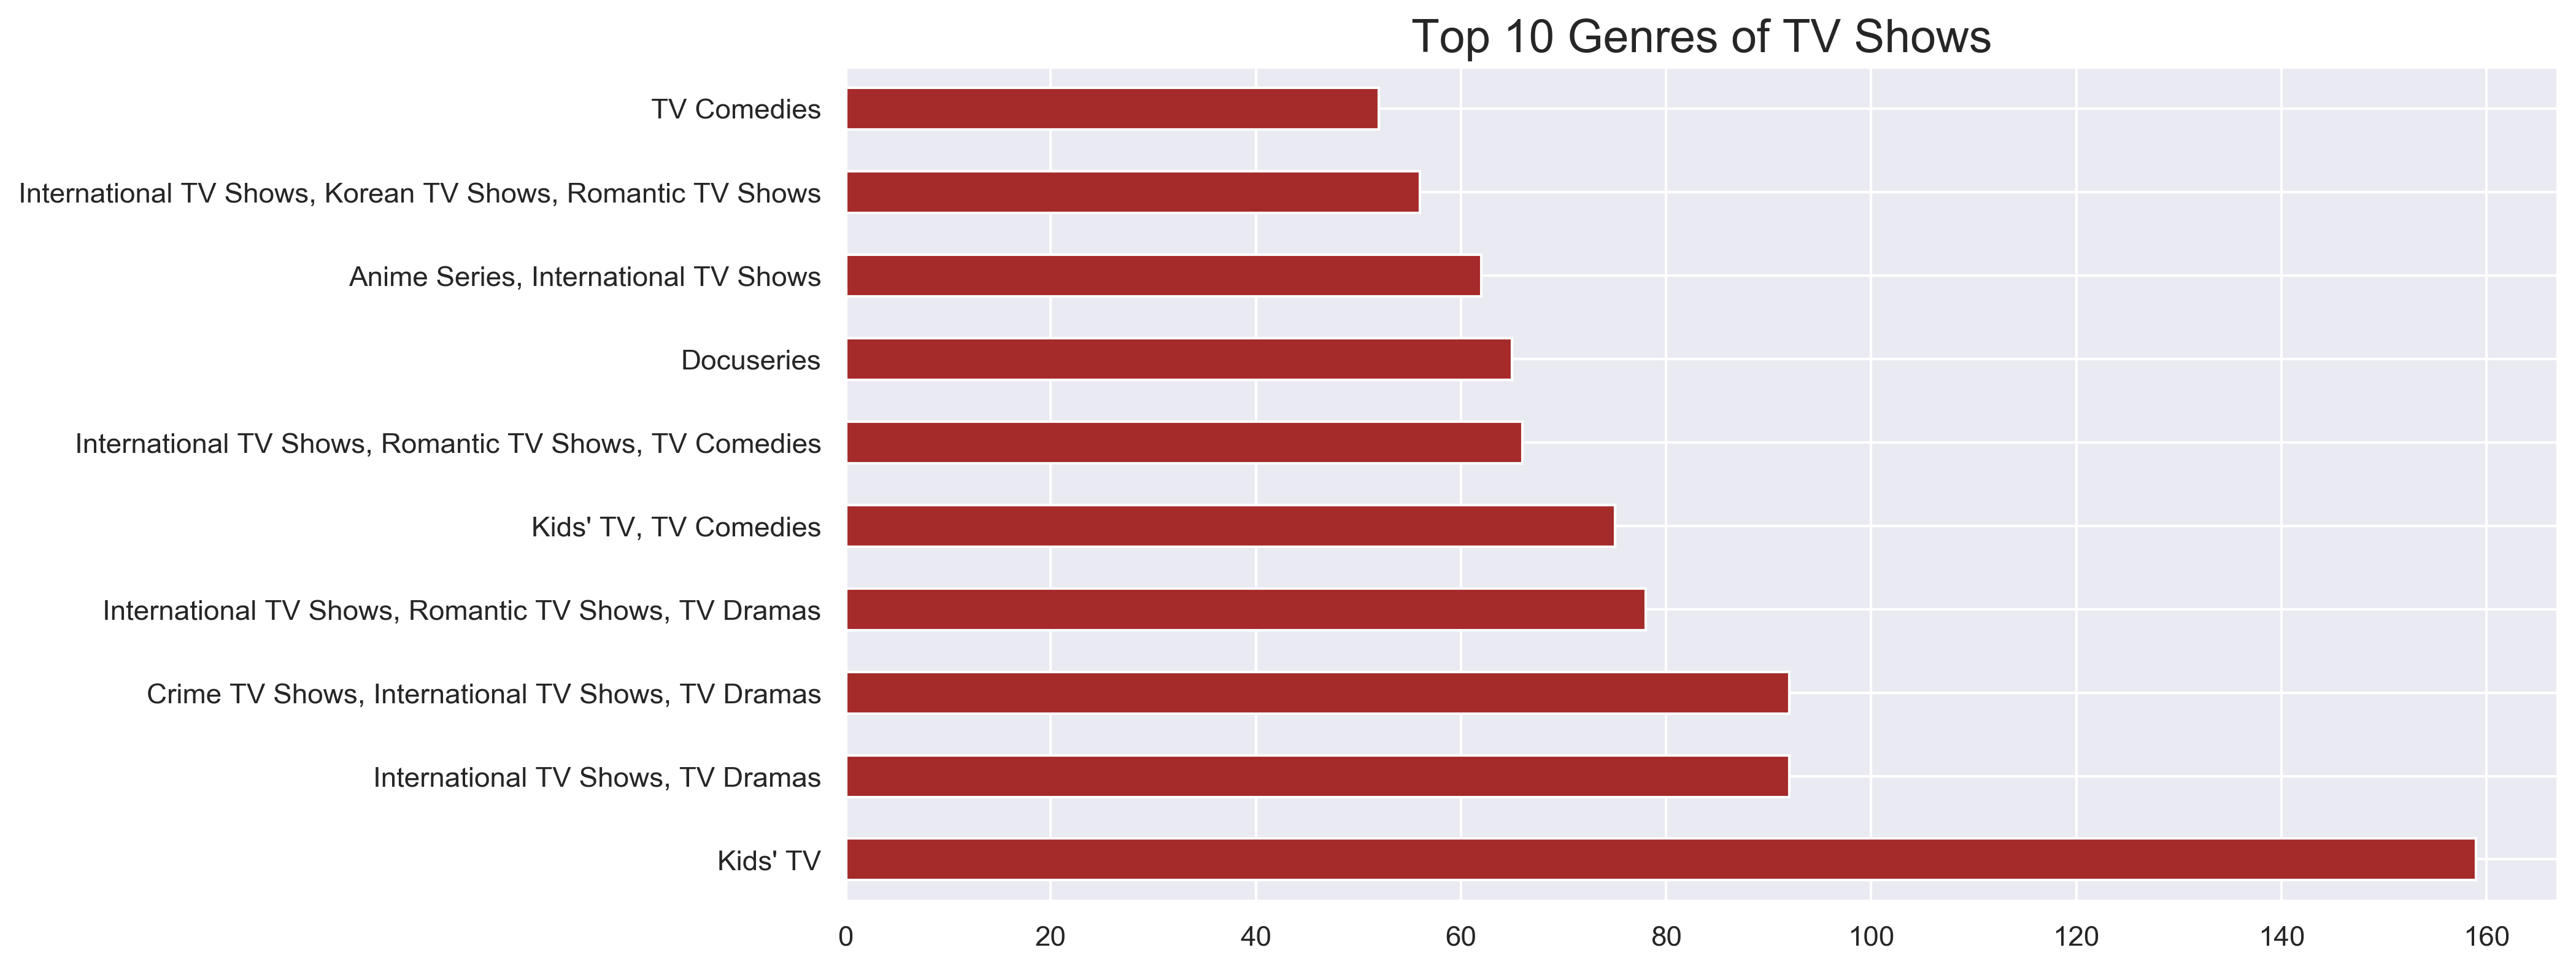

In [42]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

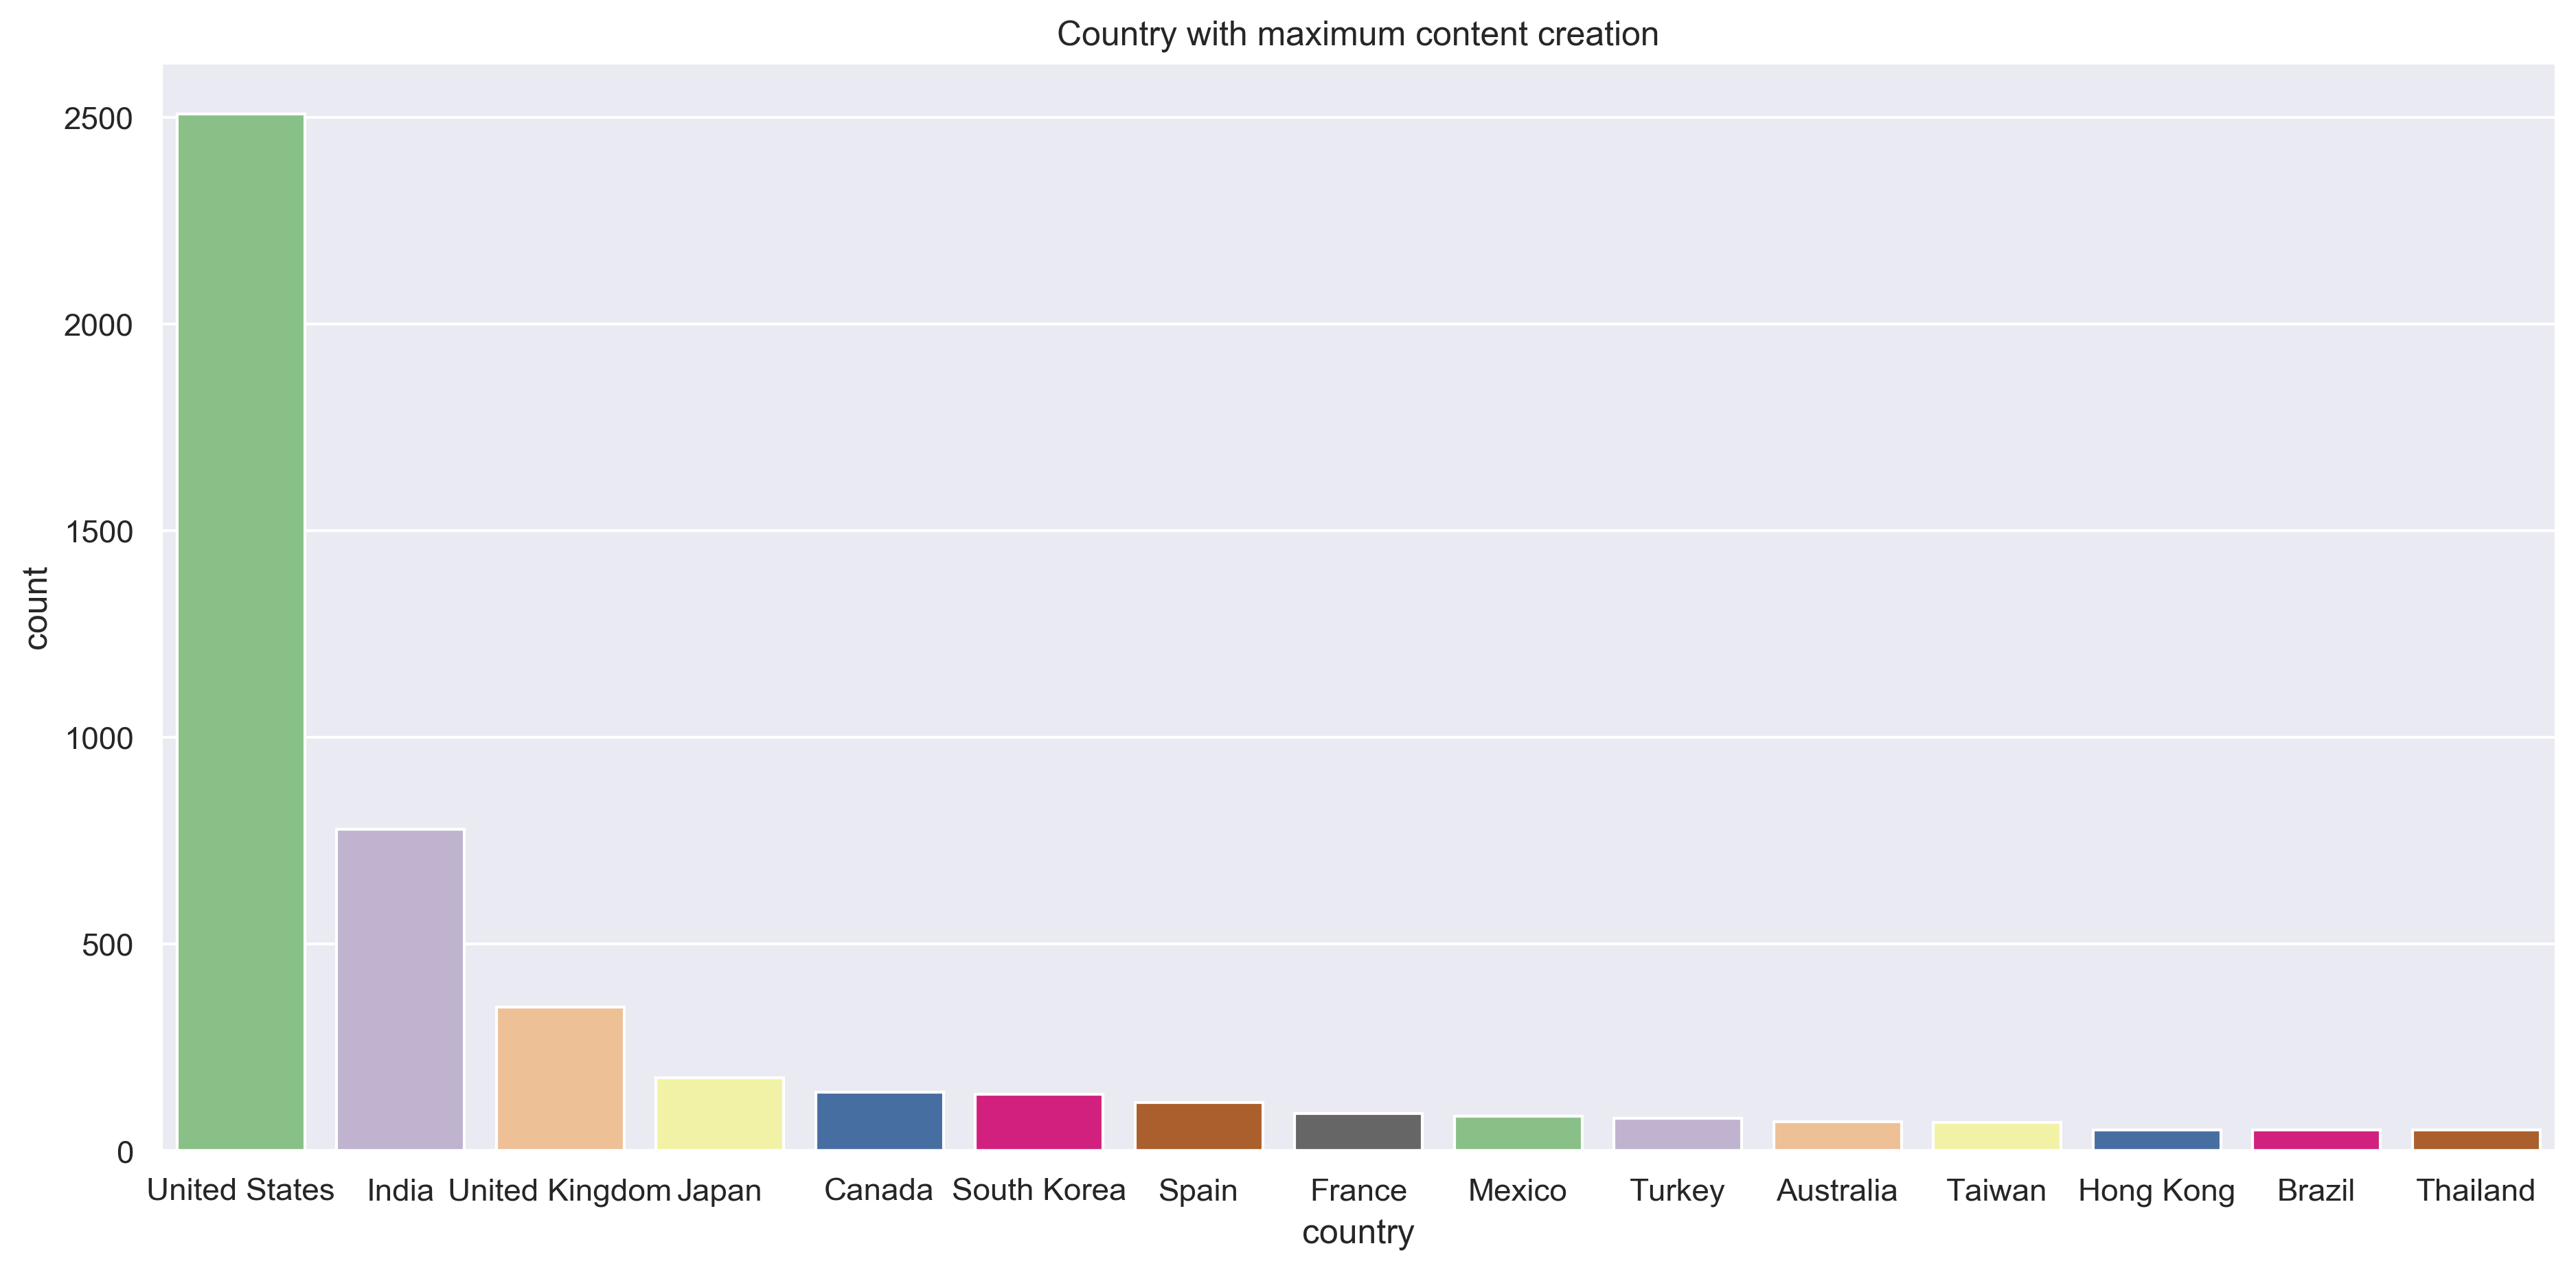

In [48]:
#US and india have maximum content creation, netflix is relatively new to india
plt.figure(1, figsize=(15, 7))
plt.title("Country with maximum content creation")
sns.countplot(x = "country", order=data['country'].value_counts().index[0:15] ,data=data,palette='Accent')

# Recommendation system

In [53]:
data2 = pd.read_csv('netflix_titles.csv')
new_df = data2[['title','director','cast','listed_in','description']]
new_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [54]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7827 sha256=1e5c96836c881a2c93ac42e622c99662cd158800b2fafb682e4cf74aa2cc33ff
  Stored in directory: c:\users\pau12\appdata\local\pip\cache\wheels\7c\d9\8a\b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [55]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
new_df.dropna(inplace=True)

blanks = []  # start with an empty list

col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

In [56]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

In [57]:
# discarding the commas between the actors' full names and getting only the first three names
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

In [58]:
new_df.set_index('title', inplace = True)
new_df.head()

,director,cast,listed_in,Key_words
title,,,,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby","[alanmarriott, andrewtoth, briandobson]","[children & family movies, comedies]","[polar, bear, king, must, take, back, stolen, ..."
#realityhigh,fernandolebrija,"[nestacooper, katewalsh, johnmichaelhiggins]",[comedies],"[cross, hairs, ex, nerdy, high, schooler, dani..."
Automata,gabeibáñez,"[antoniobanderas, dylanmcdermott, melaniegriff...","[international movies, sci-fi & fantasy, thr...","[insurance, adjuster, dystopian, future, robot..."
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz",[fabriziocopano],[stand-up comedy],"[next, level, reflecting, stand, family, whats..."
Good People,henrikrubengenz,"[jamesfranco, katehudson, tomwilkinson]","[action & adventure, thrillers]","[money, neighbor, struggling, couple, believe,..."


In [59]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

In [61]:
new_df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby alanmarriott andrewtoth ..."
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...
Automata,gabeibáñez antoniobanderas dylanmcdermott mela...
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz fabriziocopano st..."
Good People,henrikrubengenz jamesfranco katehudson tomwilk...


# Feature Extraction / Modeling

In [62]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                               #realityhigh
2                                   Automata
3         Fabrizio Copano: Solo pienso en mi
4                                Good People
Name: title, dtype: object

In [63]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.04454354, 0.04166667, ..., 0.        , 0.        ,
        0.03450328],
       [0.04454354, 1.        , 0.        , ..., 0.        , 0.03253   ,
        0.03688556],
       [0.04166667, 0.        , 1.        , ..., 0.03311331, 0.03042903,
        0.03450328],
       ...,
       [0.        , 0.        , 0.03311331, ..., 1.        , 0.31437304,
        0.38388595],
       [0.        , 0.03253   , 0.03042903, ..., 0.31437304, 1.        ,
        0.32756921],
       [0.03450328, 0.03688556, 0.03450328, ..., 0.38388595, 0.32756921,
        1.        ]])

In [64]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [65]:
recommendations('Rocky')

['Rocky III',
 'Rocky IV',
 'Rocky II',
 'Rocky V',
 "Logan's Run",
 'Indiana Jones and the Last Crusade',
 'Don',
 'Thong Dee Fun Khao',
 'Arjun: The Warrior Prince',
 'The Bleeder']

In [66]:
recommendations('Love')

['Luck by Chance',
 'Swami',
 'The Rehearsal',
 'Kabir Singh',
 'Cities of Last Things',
 'Taramani',
 'Lens',
 'Atlantics',
 'Estar o no estar',
 'Teenage Cocktail']